In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_test.shape

(10000, 28, 28)

8


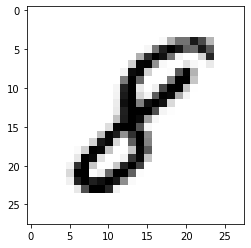

In [4]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               649088    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 650,678
Trainable params: 650,678
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 34s 568us/step - loss: 0.2046 - acc: 0.9382
Epoch 2/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0830 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0566 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0452 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.0345 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.0298 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.0253 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0217 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.0193 

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 160us/step


[0.06872460329002751, 0.9853]

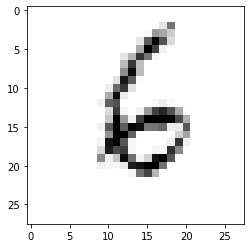

In [12]:
image_index = 2000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [13]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Prediction: ", pred.argmax())

Prediction:  6


In [14]:
print(pred)

[[9.4247933e-14 2.3335377e-15 6.6643690e-13 2.2165205e-11 6.6218466e-13
  7.4945676e-09 1.0000000e+00 3.1292897e-19 3.5993072e-10 9.6841231e-17]]
